ACT 5: USO DE SOFTWARE PARA BUSQUEDA-JUAN CARLOS GIRON MEZA 2109598-N1/LMV

Librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


Datos de MNIST

In [2]:

keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


Se asignan los nombres a cada uno de los conjuntos de datos del 0 al 9

In [3]:

class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete','Ocho', 'Nueve']

Se explora el set de datos con el que se entrenara el modelo

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
len(y_train)

60000

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
len(y_test)

10000

Preprocesamiento de datos

<function matplotlib.pyplot.show(close=None, block=None)>

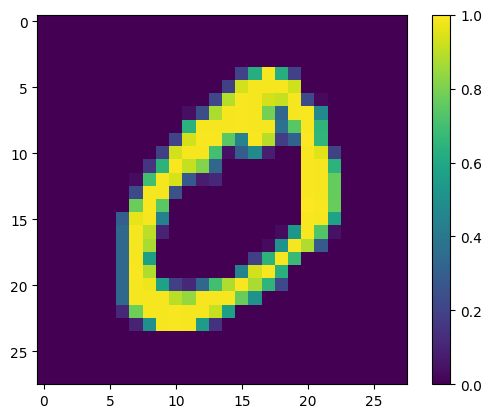

In [62]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

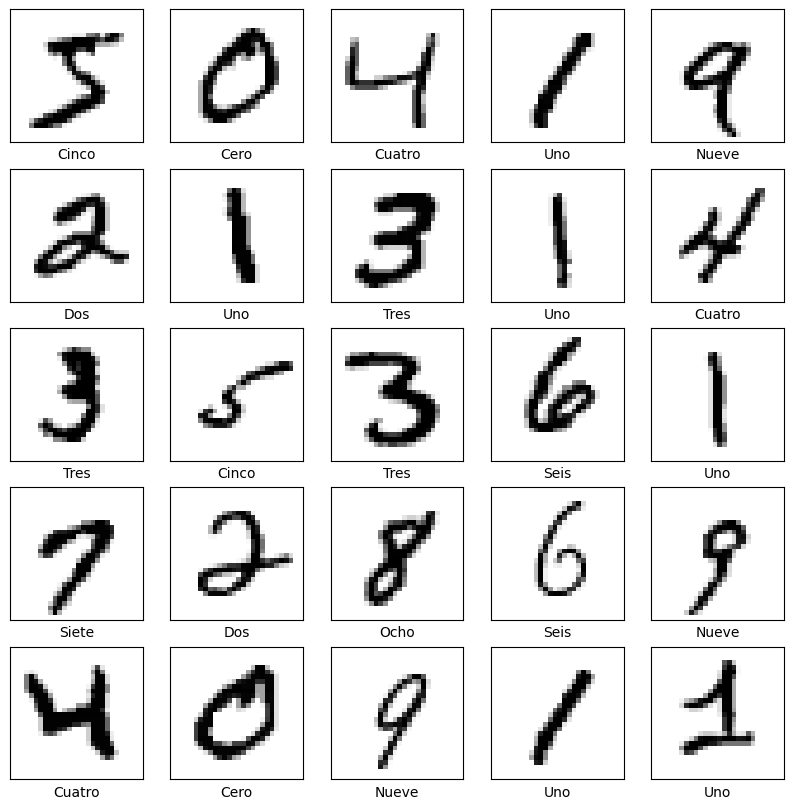

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

Se construye el modelo de red neuronal, donde se configuran las capas del modelo

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Se compila el modelo entrenado

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Se entrena el modelo

In [15]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2562 - accuracy: 0.9273
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1129 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0781 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0592 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0464 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0367 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0292 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0245 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0201 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.017

Se evalua la exactitud del modelo

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0854 - accuracy: 0.9788 - 732ms/epoch - 2ms/step

Test accuracy: 0.9787999987602234


Se realizar las predicciones

In [18]:
predicciones = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


Predicción 1

In [19]:

predicciones[1]

array([1.6987349e-12, 1.5195766e-08, 9.9999982e-01, 7.1606365e-08,
       1.7248996e-24, 7.9994874e-12, 2.6026237e-11, 2.0911724e-21,
       4.8406470e-09, 5.5245408e-18], dtype=float32)

In [21]:
np.argmax(predicciones[1])

2

In [22]:
y_test[1]

2

Predicción 2

In [28]:
predicciones[7]

array([1.57138636e-12, 1.11041860e-08, 6.25176000e-09, 3.82780912e-04,
       1.06037005e-05, 3.18346807e-08, 1.89002845e-15, 4.27091976e-07,
       1.25778621e-09, 9.99606192e-01], dtype=float32)

In [29]:
np.argmax(predicciones[7])

9

In [30]:
y_test[7]

9

Predicción 3

In [31]:
predicciones[11]

array([3.1531744e-07, 5.8633841e-11, 2.9020356e-07, 1.4933953e-09,
       2.0089841e-10, 2.1771359e-07, 9.9994522e-01, 2.3578887e-13,
       5.3861364e-05, 2.4752141e-11], dtype=float32)

In [32]:
np.argmax(predicciones[11])

6

In [33]:
y_test[11]

6

Predicción 4

In [34]:
predicciones[25]

array([9.9999994e-01, 4.8195392e-21, 4.9350931e-13, 1.7362789e-19,
       1.7171569e-12, 5.0317668e-17, 1.1720155e-09, 4.6703962e-16,
       6.4680955e-16, 7.3372482e-11], dtype=float32)

In [35]:
np.argmax(predicciones[25])

0

In [36]:
y_test[25]

0

Predicción 5

In [37]:
predicciones[3448]

array([1.1920349e-09, 5.2668311e-06, 4.8290640e-05, 9.9994618e-01,
       1.6148262e-10, 6.0507550e-09, 1.2823841e-09, 6.3762451e-10,
       2.2708755e-07, 1.5608763e-11], dtype=float32)

In [38]:
np.argmax(predicciones[3448])

3

In [39]:
y_test[3448]

3

Se grafica para poder ver todo el set de la prediccion de las 10 clases.

In [43]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Grafica de la predicción 1

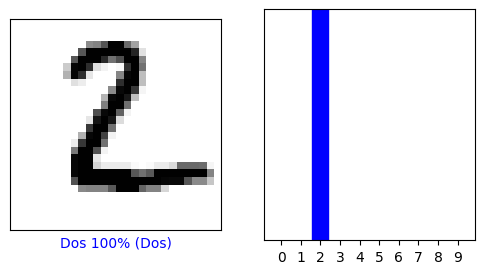

In [44]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Grafica de la predicción 2

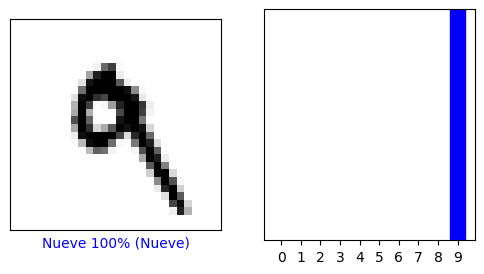

In [47]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Grafica predicción 3

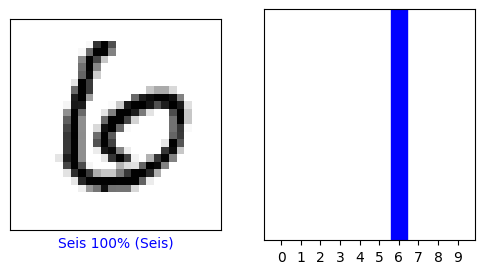

In [48]:
i = 11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Grafica prediccion 4

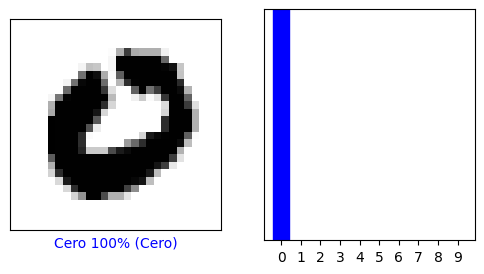

In [49]:
i = 25
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Grafica predicción 5

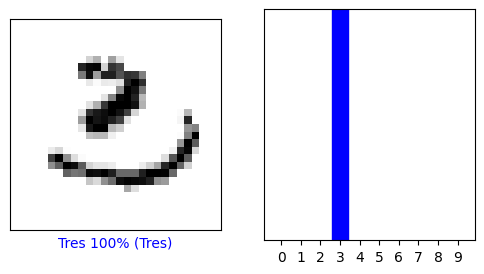

In [50]:
i = 3448
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones

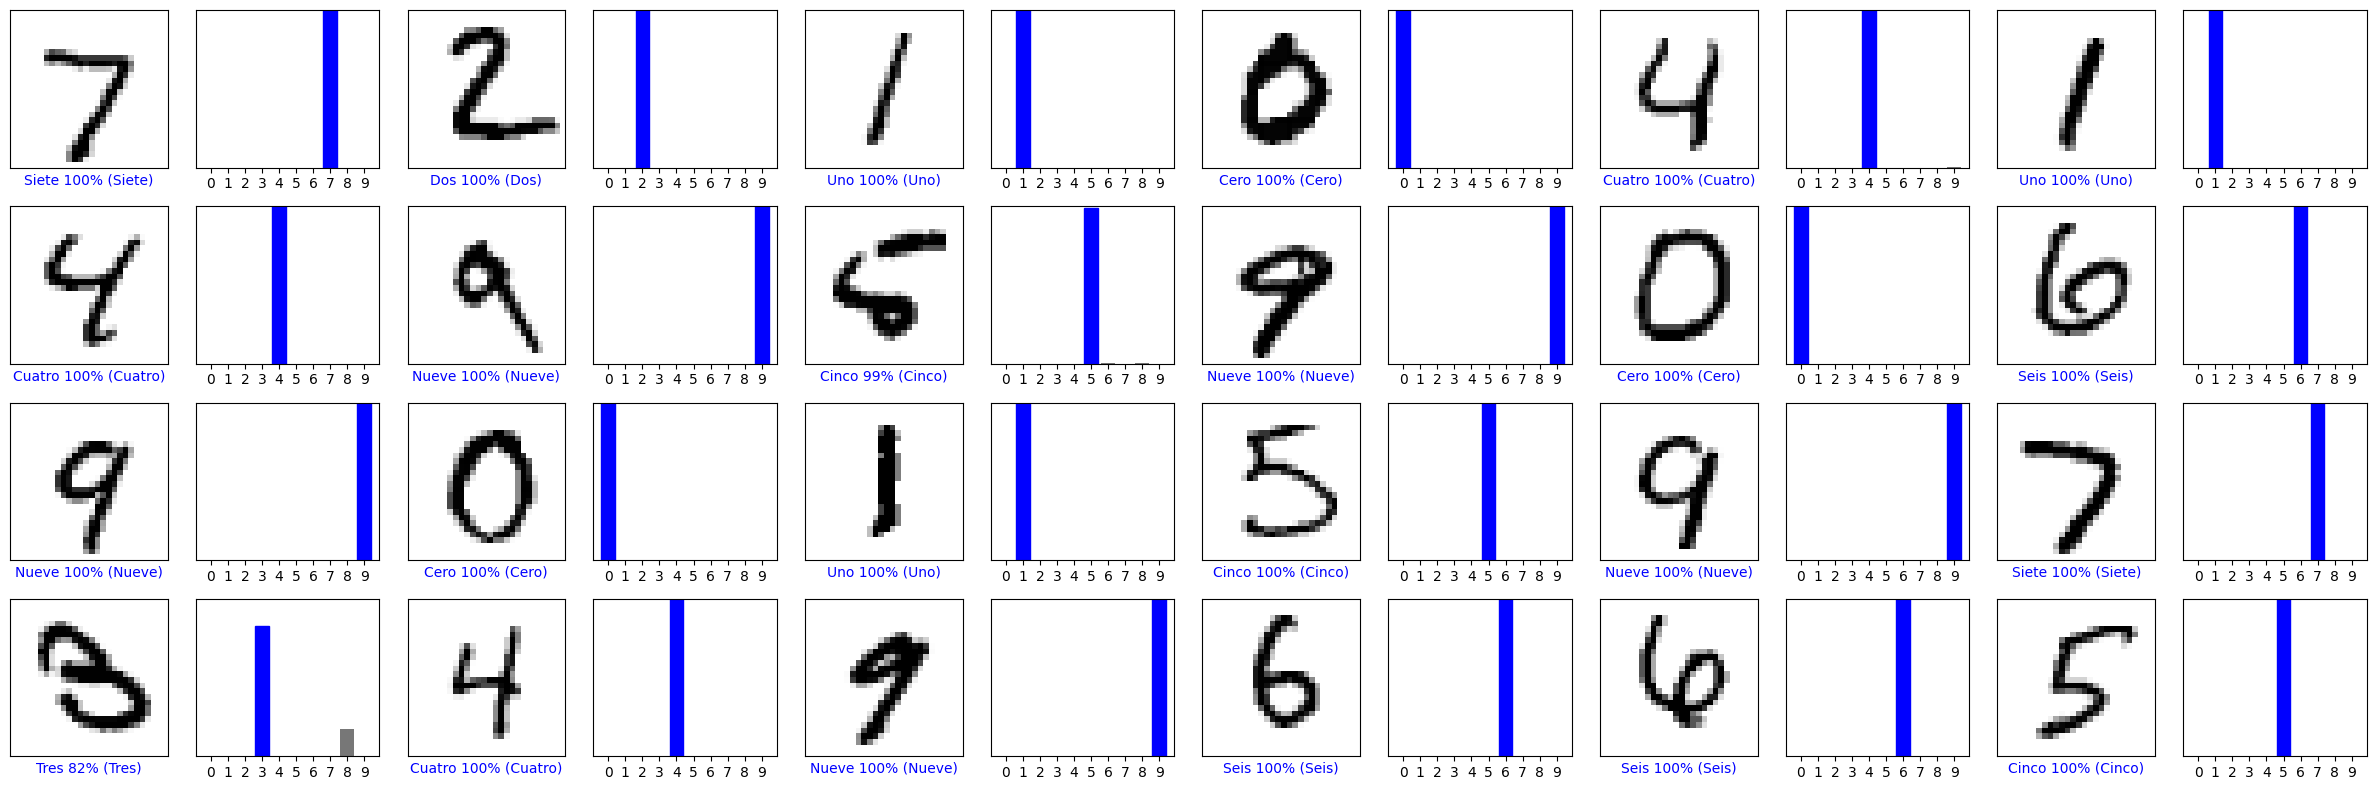

In [51]:
num_rows = 4
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predicciones[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predicciones[i], y_test)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.



In [52]:
img = x_test[1]
print(img.shape)

(28, 28)


In [56]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 1, 1, 1, 28, 28)


In [57]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 70ms/step
[[1.6987383e-12 1.5195798e-08 9.9999988e-01 7.1606507e-08 1.7249130e-24
  7.9995038e-12 2.6026287e-11 2.0911726e-21 4.8406563e-09 5.5245408e-18]]


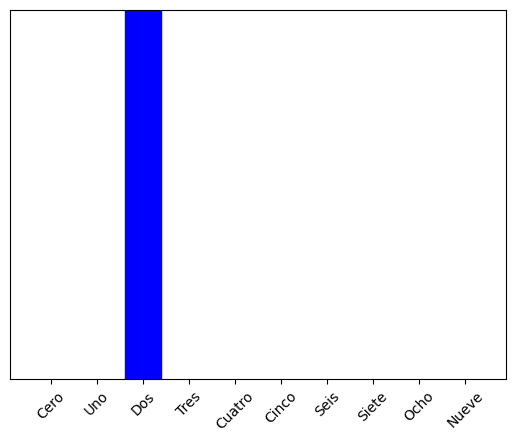

In [58]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [59]:
np.argmax(predictions_single[0])

2